# 우리 기업의 VIP는 누구인가?

## 상황 인식과 문제 정의

### 1) 상황 인식
지금까지 미루고 있었던 VIP고객 선정과 맞춤형 프로모션을 제안할 때가 왔다.

### 2) 문제 정의
> 핵심 문제: 우리 기업의 VIP 고객은 누구인가?

우리 고객들 중 VIP를 선정하고 특별 프로모션을 진행하려고 한다. <br>
- 우리 기업의 VIP 고객은 누구일까?
- 그리고 VIP는 어떤 기준으로 선정해야할까?

## 데이터 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import datetime as dt

In [2]:
# sales_data 변수를 만들고 sales_05.csv 값을 할당
sales_data = pd.read_csv('./data/sales_05_8.csv')

# sales_data의 head 값 확인하기
sales_data.head()

,Install,Time_stamp,Status,ID,Payment,Game_Name
0,2022-01-14,2022-01-27,purchase,Heidi_635,19900,Soccer Manager
1,2022-03-10,2022-03-13,purchase,Courtney_067,900,Mine Ground
2,2022-02-13,2022-02-19,purchase,David_737,9900,Soccer Manager
3,2022-02-07,2022-02-25,purchase,Lindsay_820,4900,Mine Ground
4,2022-03-06,2022-03-10,purchase,Jon_823,49900,Soccer Manager


In [3]:
# sales_data의 정보 확인하기
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75087 entries, 0 to 75086
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Install     75087 non-null  object
 1   Time_stamp  75087 non-null  object
 2   Status      75087 non-null  object
 3   ID          75087 non-null  object
 4   Payment     75087 non-null  int64 
 5   Game_Name   75087 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


### 고유한 ID 몇 개인지 확인

In [4]:
# salses_data의 ID의 고유값 확인하기
len(sales_data['ID'].unique())

52672

총 52672명의 고객이 우리 게임을 즐기고 있다. <br>
VIP를 어떻게 가려낼까? <br>
일반적으로 사용되는 방법은 __RFM(Recency, Frequency, Monetary)__ 이다. <br>
- 최근성(Recency): 현재 시점에서 마지막 기록 간의 차이
- 빈번함(Frequency): 지금까지 결제한 총 횟수
- 결제금액(Monetary): 지금까지 결제한 총 금액

In [5]:
# sales_data에 Now열을 만들고 2022년 6월 10일로 가정
sales_data['Now'] = '2022-06-10'

# Now열 값을 시간 계산을 위한 datetime으로 전환
sales_data['Now'] = pd.to_datetime(sales_data['Now'])

# sales_data의 Time_stamp열 값을 시간 계산을 위한 datetime으로 전환
sales_data['Time_stamp'] = pd.to_datetime(sales_data['Time_stamp'])

# sales_data 중 Status가 'Purchase'인 행들만 골라내기
sales_data = sales_data[sales_data['Status']=='purchase']

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27682 entries, 0 to 27681
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Install     27682 non-null  object        
 1   Time_stamp  27682 non-null  datetime64[ns]
 2   Status      27682 non-null  object        
 3   ID          27682 non-null  object        
 4   Payment     27682 non-null  int64         
 5   Game_Name   27682 non-null  object        
 6   Now         27682 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 1.7+ MB


총 75087건의 로그 기록 중 결제 기록은 27682건으로 플레이 수 대비 약 36% 수준이 결제를 했다.

### 이전 결제 기록이 있는 행만 빼서 RFM을 도출해보자

In [6]:
# sales_data에 'Interval'열을 만들고 지금 시간에서 마지막 기록된 시간인 Time_stamp 값 빼기
sales_data['Interval'] = sales_data['Now'] - sales_data['Time_stamp']

In [7]:
# RFM_data 변수를 만들고 Groupby()함수를 이용해서 Recency, Frequency, Monetary 집계하기
RFM_data = sales_data.groupby(['ID']).agg({'Interval':'min','ID': 'count', 'Payment': 'sum'})

# RFM_data의 열 값을 각각 Recency, Frequency, Monetary로 변경
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data.head()

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60 days,5,40500
Aaron_031,102 days,5,17500
Aaron_077,40 days,4,26600
Aaron_165,21 days,4,49600
Aaron_224,108 days,1,900


In [8]:
# RFM_data의 Recency 열 값을 숫자로 변경
RFM_data['Recency'] = RFM_data['Recency'].dt.days
RFM_data

,Recency,Frequency,Monetary
ID,,,
Aaron_027,60,5,40500
Aaron_031,102,5,17500
Aaron_077,40,4,26600
Aaron_165,21,4,49600
Aaron_224,108,1,900
...,...,...,...
Zachary_937,101,4,11600
Zachary_948,48,5,26500
Zoe_163,11,5,105500


### RFM의 기술통계량을 살펴보자

In [9]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,5267.000000,5267.000000,5267.000000
mean,66.517752,5.255743,50340.003797
std,35.684775,6.995041,73012.364791
min,7.000000,1.000000,900.000000
25%,36.000000,1.000000,9900.000000
50%,61.000000,5.000000,29900.000000
75%,94.000000,5.000000,55500.000000
max,158.000000,37.000000,582700.000000


In [10]:
# RFM_data의 기술통계량 살펴보기 
RFM_data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Recency,5267.0,66.52,35.68,7.0,36.0,61.0,94.0,158.0
Frequency,5267.0,5.26,7.00,1.0,1.0,5.0,5.0,37.0
Monetary,5267.0,50340.00,73012.36,900.0,9900.0,29900.0,55500.0,582700.0


count: 데이터 개수
- 결제기록이 있는 고객의 수는 총 5,267명이다.

mean: 각 요소별 평균
- 데이터 값의 총합을 개수로 나눈 값이다.
- RFM처럼 측정단위가 다른 데이터를 다룰 경우 단위를 잘 고려해야 한다. <br>
Recency는 66.5일, Frequency는 5.2회, Monetary는 50,340원이다.

std(Standard Deviation): 각 요소별 표준편차
- 표준편차는 평균을 중심으로 각 요소 값들이 얼마나 떨어져 있는지를 나타낸다. <br>
분산의 제곱근으로 계산될 수 있다. <br>
편차를 제곱함으로써 단위 의미가 없어지는 분산에 비해 각 측정단위를 갖는다는 장점이 있다. <br>
Recency는 35.68일, Frequency는 7회, Monetary는 73,012원이다.

min: 각 요소별 최솟값
- Recency는 7일, Frequency는 1회, Monetary는 900원이다. <br>
가장 최근에 결제한 고객은 7일전에 결제를 했다.

25%~75%: 사분위수 범위
- 전체 데이터 집단을 크기순으로 나열했을 때, 전체의 25% 위치의 값, 50% 위치의 값, 75% 위치의 값을 의미한다. <br>
이때 50% 위치의 값을 중위값(Median)이라고도 한다. <br>
25% 위치에서부터 75% 위치까지의 범위를 사분위범위(IQR:Interquartile Range)라고도 한다. <br>
표준편차가 75% 위치값을 벗어나는 경우 데이터가 넓게 흩어져있다는 의미가 된다. <br>
Recency를 제외하고 Frequency와 Monetary의 데이터는 넓게 흩어져 있을 것 같다.

max: 각 요소별 최댓값
- Recency는 158일, Frequency는 37회, Monetary는 582,700원이다. <br>
가장 자주 결제한 고객은 무려 37회나 결제했다. <br>
그리고 가장 많은 누적금액을 결제한 고객은 582,700원이다.

좀 더 구체적으로 살펴보기 위해 시각화를 진행해보자

In [11]:
# RFM_data의 Recency열 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬
temp_var = RFM_data.sort_values(by=['Recency'], ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_218,158,1,900
Michael_254,155,1,900
Craig_831,155,1,19900
Matthew_192,154,1,900
Greg_925,154,1,900


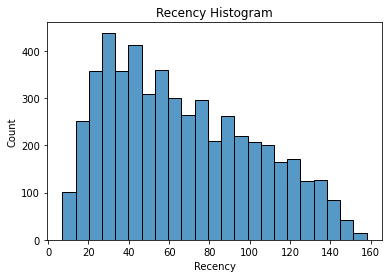

In [12]:
# RFM_data의 Recency열 값을 히스토그램으로 시각화
ax = sns.histplot(data=RFM_data['Recency'])
plt.title('Recency Histogram')
plt.show()

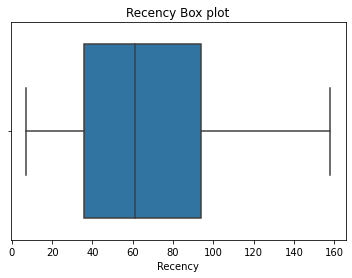

In [13]:
# RFM_data의 Recency열 값을 상자도표(Box Plot)으로 시각화
ax = sns.boxplot(data=temp_var, x='Recency')
plt.title('Recency Box plot')
plt.show()

In [14]:
# RFM_data의 Frequency열 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬
temp_var = RFM_data.sort_values(by='Frequency', ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Jacob_633,33,37,294300
Steven_767,23,37,391300
Wayne_179,56,37,381300
Michael_443,54,37,364300
Robert_522,25,37,306300


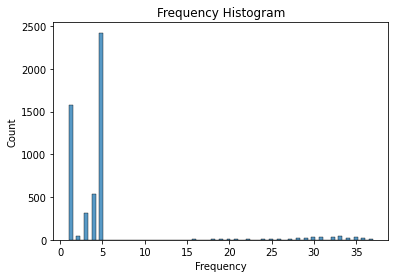

In [15]:
# RFM_data의 Frequency열 값을 히스토그램으로 시각화
ax = sns.histplot(data = RFM_data['Frequency'])
plt.title('Frequency Histogram')
plt.show()

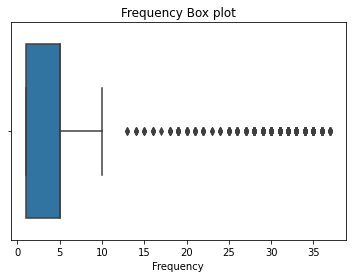

In [16]:
# RFM_data의 Frequency열 값을 상자도표(Box Plot)로 시각화
sns.boxplot(data=temp_var, x='Frequency')
plt.title('Frequency Box plot')
plt.show()

In [17]:
# RFM_data의 Monetary열 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬
temp_var = RFM_data.sort_values(by='Monetary', ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
ID,,,
Nancy_098,26,33,582700
Linda_829,114,32,561800
Caleb_717,30,37,555300
Grace_792,87,35,551500
Sarah_679,71,33,486700


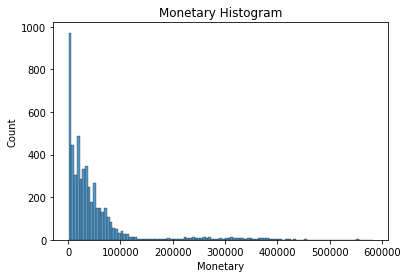

In [18]:
# RFM_data의 Monetary열 값을 히스토그램으로 시각화
ax = sns.histplot(data = RFM_data['Monetary'])
plt.title('Monetary Histogram')
plt.show()

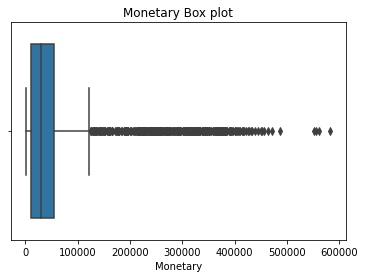

In [19]:
# RFM_data의 Monetary열 값을 상자도표(Box Plot)로 시각화
sns.boxplot(data=temp_var, x='Monetary')
plt.title('Monetary Box plot')
plt.show()

특히 눈에 띄는건 Frequency와 Monetary이다. <br>
기술통계량에서 눈치챈 것처럼 각 요소들의 데이터값이 엄청 넓게 흩어져 있는것을 확인할 수 있다. <br>
이런 결과는 일부 고객들이 결제하는 빈도와 누적 금액이 다른 고객들과 비교했을 때 큰 차이를 보인다는 것을 암시한다. 사실 이런 결과는 매우 흔하게 일어난다. <br>
보통 상위 20% 수준의 사용자가 전체 결제금액의 80% 수준을 결제하곤 한다. <br>
이런 현상을 파레토(Pareto) 법칙 이라고 부르기도 한다. <br>

그럼 지금부터는 RFM의 각 요소별 개별 점수(score)를 부여하고 최종적인 RFM score를 계산하여 우리 기업의 VIP를 찾아내 보도록 하자.

### 우리 기업의 VIP 찾기
점수를 정규화하자

In [20]:
# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()

,Recency,Frequency,Monetary,R_score
ID,,,,
Aaron_027,60,5,40500,65.25
Aaron_031,102,5,17500,37.72
Aaron_077,40,4,26600,78.36
Aaron_165,21,4,49600,90.82
Aaron_224,108,1,900,33.78


In [21]:
# RFM_data의 F_score열을 만들고, Frequency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)

# RFM_data의 M_score열을 만들고, Monetary열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)


In [22]:
# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
ID,,,,,,
Aaron_027,60,5,40500,65.25,12.00,7.74
Aaron_031,102,5,17500,37.72,12.00,3.82
Aaron_077,40,4,26600,78.36,9.25,5.37
Aaron_165,21,4,49600,90.82,9.25,9.29
Aaron_224,108,1,900,33.78,1.00,1.00


정규화할 때 기업에서 중요하게 생각하는 요소 또는 데이터 분석가의 성향 등에 따라 각 요소별 가중치를 다르게 지정할 수 있다. <br>
여기서는 일반적인 산술평균값으로 계산하자.

In [23]:
# RFM_data에 RFM_score열을 만들고, 각 요소별 산술평균값을 할당
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)

Class열을 만들고 RFM_score 값을 지정한 분위값 범위에 따라 라벨을 입력한다. 여기서는 전체의 40%를 5등급, 25%를 4등급, 20%를 3등급, 14%를 2등급, 1%를 1등급으로 구분한다.

In [24]:
# RFM_data에 Class열을 만들고, RFM_score와 지정한 분위값 범위에 따라 labels 값을 입력합니다
RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.65, 0.85, 0.99, 1], labels=[5,4,3,2,1])

In [25]:
# Class가 입력된 RFM_data의 인덱스를 재정렬합니다.
RFM_data = RFM_data.reset_index()
RFM_data

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Aaron_027,60,5,40500,65.25,12.00,7.74,28.33,4
1,Aaron_031,102,5,17500,37.72,12.00,3.82,17.85,5
2,Aaron_077,40,4,26600,78.36,9.25,5.37,30.99,3
3,Aaron_165,21,4,49600,90.82,9.25,9.29,36.45,2
4,Aaron_224,108,1,900,33.78,1.00,1.00,11.93,5
...,...,...,...,...,...,...,...,...,...
5262,Zachary_937,101,4,11600,38.37,9.25,2.82,16.81,5
5263,Zachary_948,48,5,26500,73.12,12.00,5.36,30.16,4
5264,Zoe_163,11,5,105500,97.38,12.00,18.80,42.73,2
5265,Zoe_536,88,1,900,46.89,1.00,1.00,16.30,5


### 우리 기업의 VIP들은 어떤 특징들을 보이고 있을까?

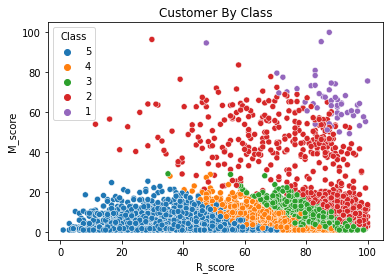

In [26]:
# R_score와 M_score를 기준으로 산포도(scatter) 그리기
sns.scatterplot(data=RFM_data, x='R_score', y='M_score', hue='Class')
plt.title('Customer By Class')
plt.show()

우리 기업의 VIP라고 볼 수 있는 1%의 고객들, 즉 class 값이 1인 고객들은 모두 R score과 M score가 높은 것을 확인할 수 있다.

### 파이그래프를 통해 한 번 확인해보자

In [27]:
# RFM_data의 ID값을 Class열을 기준으로 집계
temp_var = RFM_data['ID'].groupby(RFM_data['Class']).count()
temp_var

Class
5    2109
4    1319
3    1049
2     737
1      53
Name: ID, dtype: int64

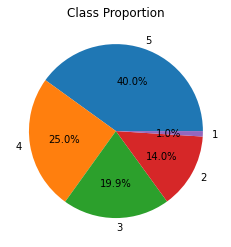

In [28]:
# 집계 결과(VIP 등급별 고객 수)에 따른 파이그래프 그리기
plt.pie(temp_var, labels=temp_var.index, autopct = '%1.1f%%')
plt.title('Class Proportion')
plt.show()

해당 범위에 맞게 잘 나누어진 것 같다. 이제 각 class 구간별로 Recency, Frequency, Monetary가 어떤 차이들이 있는지 살펴보자

In [29]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [30]:
# 집계된 평균값 전치(Transpose)
temp_var.T

Class,5,4,3,2,1
Recency,101.7,55.0,34.3,35.1,27.2
Frequency,2.7,3.6,4.3,15.0,33.9
Monetary,23367.4,32101.2,40620.6,150000.1,384081.1


class 1부터 5까지 각 집단들은 상이하게 다른 RFM 값을 보여주고 있다. <br>
예를 들어 class 1은 평균 27일 전 구매, 33.9회 결제, 누적결제금액 384081원을 보이고 있는 반면 <br>
class 5는 평균 101일전 구매, 2.7회 구매, 누적결제금액 23367원을 보이고 있다. <br>
class 1에 속하는 고객들은 역시 VIP라고 할만하다.

이제 각 class별 RFM 평균값을 시각화해보자

In [31]:
# 집계된 temp_var의 MultiIndex를 NormalIndex로 변환합니다. 
temp_var.index = temp_var.index.tolist()
temp_var

,Recency,Frequency,Monetary
5,101.7,2.7,23367.4
4,55.0,3.6,32101.2
3,34.3,4.3,40620.6
2,35.1,15.0,150000.1
1,27.2,33.9,384081.1


In [32]:
# temp_var의 인덱스를 재정렬하고, 컬럼 이름을 Class로 변경합니다. 
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var

,Class,Recency,Frequency,Monetary
0,5,101.7,2.7,23367.4
1,4,55.0,3.6,32101.2
2,3,34.3,4.3,40620.6
3,2,35.1,15.0,150000.1
4,1,27.2,33.9,384081.1


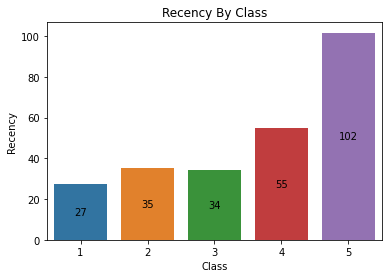

In [33]:
# 각 Class별 평균 Recency를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Recency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Recency By Class')
plt.show()

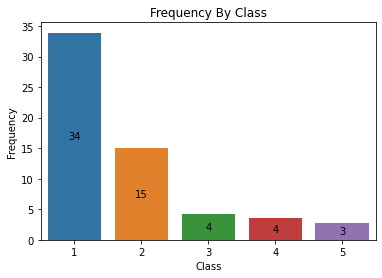

In [34]:
# 각 Class별 평균 Frequency를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Frequency')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Frequency By Class')
plt.show()

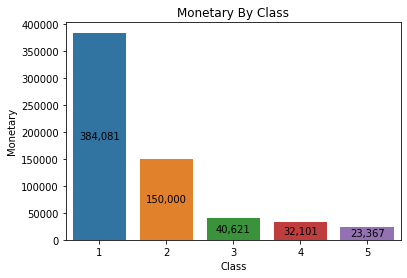

In [35]:
# 각 Class별 평균 Monetary를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Monetary')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('Monetary By Class')
plt.show()

모든 시각화 결과가 말해주듯 class 1인 집단, 즉 VIP 고객분들은 다른 집단에 비해 월등히 높은 구매 빈도와 구매 금액을 보여주고 있다.

In [36]:
# RFM_data의 Class값이 1인 행만 골라내서 VIP_customer 변수에 할당합니다. 

VIP_customer = RFM_data[RFM_data['Class'] == 1]
VIP_customer = VIP_customer.reset_index(drop=True)

VIP_customer

,ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,Amanda_596,25,33,342700,88.20,89.00,59.16,78.79,1
1,Andrew_661,20,33,374700,91.48,89.00,64.61,81.70,1
2,Ann_400,22,32,345800,90.17,86.25,59.69,78.70,1
3,Anne_496,12,32,368800,96.72,86.25,63.60,82.19,1
4,Ashley_869,35,36,425400,81.64,97.25,73.23,84.04,1
5,Bernard_818,22,32,362800,90.17,86.25,62.58,79.67,1
6,Caleb_717,30,37,555300,84.92,100.00,95.34,93.42,1
7,Charles_200,17,34,346600,93.44,91.75,59.82,81.67,1
8,Christie_867,18,36,396400,92.79,97.25,68.30,86.11,1
9,Christine_658,23,30,431000,89.51,80.75,74.19,81.48,1


3차원으로 시각화한다. 3차원으로 표현된 RFM은 현재 우리 고객들의 특성을 정의함으로써 앞으로의 고객 대응 전략을 수립할 수 있는 좋은 방향성을 제시한다.

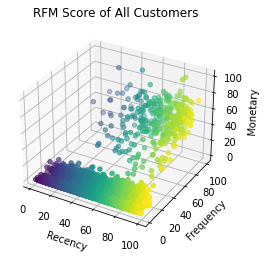

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()

### 전략 수립 및 실행
앞서 그려진 3차원 RFM 그래프는 우리 고객들이 보이는 RFM의 각 요소들의 수준을 나타낸다. <br>
일반적으로 RFM은 각 축을 이용해 기업이 보유하고 있는 고객들을 우량 고객과 비우량 고객, 그리고 안정적 고객과 신규 고객, 이탈 고객으로 구분한다. <br>
RFM의 각 점수에 따른 고객 유형은 아래 그림과 같다. RFM을 이용하면 고객에 대한 마케팅 전략의 방향성을 아래와 같이 쉽게 정의할 수 있다.
- 이탈고객의 Recency를 상승시켜 다시 신규고객으로 모집하는 전략
- 비우량 고객의 Recency와 Monetary, Frequency를 상승시켜 우량고객으로 전환하는 전략
- 신규고객의 Monetary를 상승시켜 우량고객으로 전환하는 전략
- 신규우량고객과 우량고객을 기존대로 유지하거나 안정 고객으로 전환하는 전략

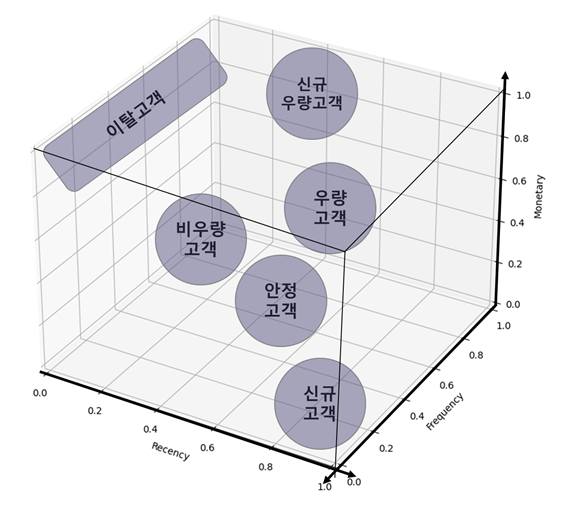